**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Verónica Andrea Bravo Benavides
*   MATRÍCULA:A01796721


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [6]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
air_df=pd.read_csv('LaqnData.csv')
#Se carga el conjunto de datos

In [8]:
air_df.shape
#El archivo contiene 43800 registros y 6 columnas

(43800, 6)

In [9]:
air_df.columns
# Los nombras de las columnas son: 'Site', 'Species', 'ReadingDateTime', 'Value', 'Units', 'Provisional or Ratified'

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [10]:
air_df.head(10)
#Podemos hacer una revisión de los primeros 10 registros del dataset

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
5,CT3,NO,01/01/2017 05:00,2.1,ug m-3,R
6,CT3,NO,01/01/2017 06:00,4.4,ug m-3,R
7,CT3,NO,01/01/2017 07:00,5.1,ug m-3,R
8,CT3,NO,01/01/2017 08:00,7.4,ug m-3,R
9,CT3,NO,01/01/2017 09:00,6.5,ug m-3,R


In [11]:
air_df.tail(10)
#Podemos hacer la revisión de los ultimos 10 registros del dataset

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43790,CT3,PM2.5,31/12/2017 14:00,8.0,ug m-3,R
43791,CT3,PM2.5,31/12/2017 15:00,2.0,ug m-3,R
43792,CT3,PM2.5,31/12/2017 16:00,2.0,ug m-3,R
43793,CT3,PM2.5,31/12/2017 17:00,4.0,ug m-3,R
43794,CT3,PM2.5,31/12/2017 18:00,5.0,ug m-3,R
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [12]:
air_df.dtypes
#Tipos de datos por columna presentes en el dataset. Esto nos permite determinar que columnas debemos cambiar más adelante para hacer el análisis de forma correcta


Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [13]:
# Calcular el porcentaje de valores faltantes por columna
missing_values = air_df.isnull().sum() / len(air_df) * 100
print(missing_values)

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64


In [14]:
air_df.isnull().sum()


Site                          0
Species                       0
ReadingDateTime               0
Value                      3230
Units                         0
Provisional or Ratified       0
dtype: int64

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [15]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

* ¿Cuántas mediciones se hicieron?
Se hicieron 8760 por contaminante

* ¿Cuántos contaminantes del aire (`Species`) se analizaron?
Se analizaron 5 contaminantes del aire

* ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
Las columnas que no agregan níngún valor informativo son: 'Site', 'Provisional or Ratified'


In [16]:
air_df.drop(['Site', 'Provisional or Ratified'], axis=1, inplace=True)

* La columna Units tampoco posee valor informativo. Verifícalo con la función unique() y elimínala del dataframe.

In [17]:
air_df.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [18]:
air_df.drop(['Units'], axis=1, inplace=True)

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [19]:
air_df.Species.value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

Cada uno de los cinco contaminantes tiene 8760 lecturas. Esto tiene sentido porque 8760 es el número total de horas en un año (365 días x 24 horas = 8760 horas), lo cual confirma que las mediciones se realizaron cada hora durante todo el año.
El total de mediciones sería la suma de todas las lecturas para los cinco contaminantes. Dado que cada contaminante tiene 8760 mediciones y hay 5 contaminantes, el total de mediciones es:43800.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [20]:
air_df.groupby('Species')['Value'].mean()



Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [21]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')


In [22]:
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [23]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


* ¿Cuál es el mayor valor de NO2 registrado? ¿A qué día pertenece?
El valor mayor de NO2 es: 120.200000 y se registró el 24/01/2017

In [24]:
pvt_df.sort_values('NO2', ascending=False).head(1)


Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


* ¿Cuál es el menor valor de PM10 registrado?¿A qué día pertenece? El valor menor registrado para PM10 =  -5.600000 y se registró el 12/09/2017

In [25]:
pvt_df.sort_values('PM10', ascending=True).head(1)


Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


* ¿Cuál es la mediana del NO? ¿Cómo se interpreta?

In [26]:
pvt_df['NO'].median()



7.1

La mediana es una medida de tendencia central que indica el valor que se encuentra en el medio de un conjunto de datos cuando estos se ordenan de menor a mayor. Esto implica que el 50% de las mediciones de NO son menores o iguales a 7.1, y el otro 50% de las mediciones son mayores o iguales a 7.1.

* ¿Cuál es el primer cuartil de PM2.5? ¿Qué significa?

El primer cuartil (25%) es: 7
Es decir el valor que  divide el primer 25% de los datos cuando estos se ordenan de menor a mayor. En este caso, el primer cuartil de las mediciones de PM2.5 es 7. Esto significa que el 25% de las mediciones de PM2.5 son iguales o inferiores a 7 y lo podemos interpretar como que  el 25% de las horas del año (es decir, aproximadamente 2,190 horas) tuvieron una concentración de PM2.5 de 7 o menos. Determinar el impacto que  puede tener este valor en el contexto, dependerá de los valor de referencia dados.

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

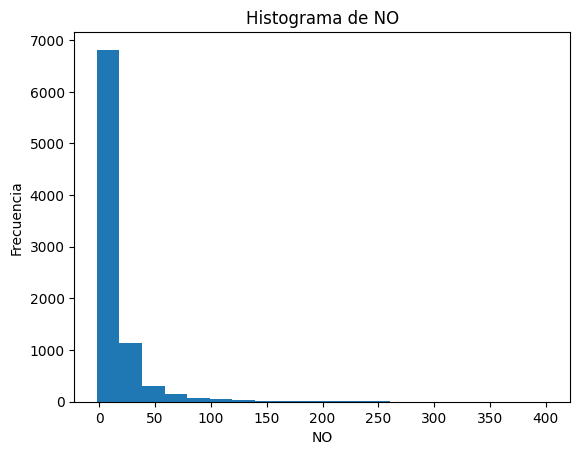

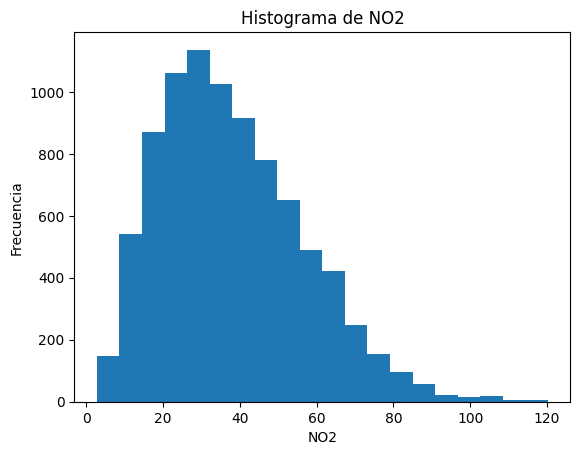

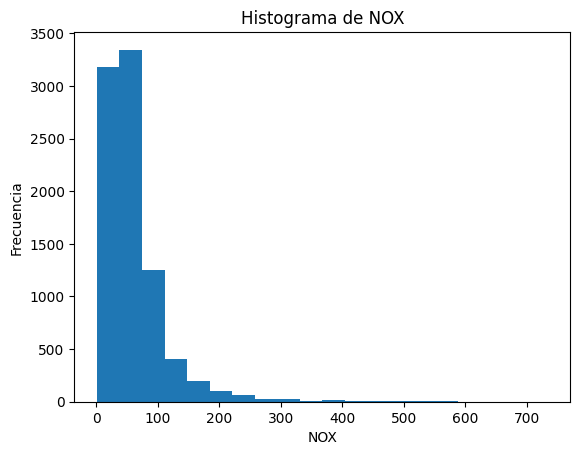

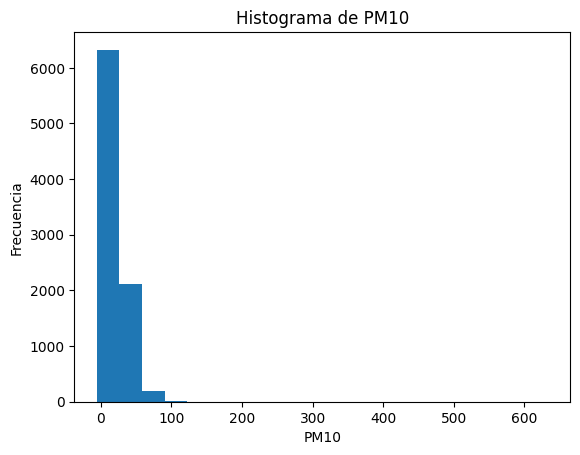

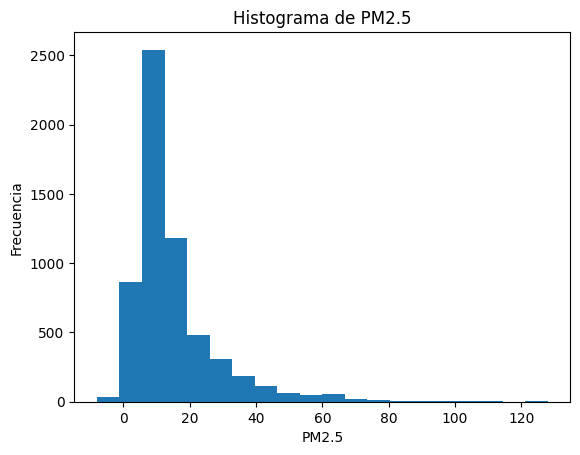

In [27]:
import matplotlib.pyplot as plt
# Dibuja un histograma para cada columna de pvt_df
for column in pvt_df.columns:
    plt.figure()
    plt.hist(pvt_df[column].dropna(), bins=20)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()



In [28]:
#Distribución
std_by_contaminant = pvt_df.std()
print(std_by_contaminant)


Species
NO       26.678565
NO2      18.580841
NOX      54.584805
PM10     15.344755
PM2.5    13.558588
dtype: float64


In [29]:
# Rango intercuartílico (IQR) para cada contaminante
iqr_by_contaminant = pvt_df.quantile(0.75) - pvt_df.quantile(0.25)
print(iqr_by_contaminant)


Species
NO       12.4
NO2      26.1
NOX      43.5
PM10     13.4
PM2.5    11.0
dtype: float64


In [30]:
#simetria
skewness_by_contaminant = pvt_df.skew()
print(skewness_by_contaminant)


Species
NO       5.429386
NO2      0.680088
NOX      3.813652
PM10     9.494859
PM2.5    2.614549
dtype: float64


* ¿Qué contaminante tiene mayor variabilidad?

El contaminante con mayor varabilidad es: NOX
La cola larga a la derecha del histograma es un indicativo de asimetría positiva y sugiere que los valores de NOX no están distribuidos de manera uniforme. En su lugar, hay una mayor concentración de valores bajos y algunos picos elevados que generan mayor variabilidad en los datos.

La mayor parte de los valores de NOX están concentrados en el rango de 0 a 100, con un gran pico en el intervalo más bajo (alrededor de 0-50).
Esto sugiere que en la mayoría de las observaciones, los niveles de NOX son bajos o moderados.

Aunque la mayor parte de los valores se encuentran en el rango bajo, el histograma muestra una cola larga que se extiende hasta valores cercanos a 600.
Este patrón indica la presencia de algunos valores excepcionalmente altos, que se registran con menor frecuencia pero que afectan significativamente la variabilidad del contaminante.

Para confirmarlo se realizaron las siguientes revisiónes:
Desviación estándar:
La desviación estándar de NOX es 54.58, lo que indica que sus valores están mucho más dispersos alrededor de la media en comparación con otros contaminantes. La dispersión elevada se debe a que, aunque la mayoría de las mediciones están concentradas en valores bajos, hay valores mucho más altos que elevan la variabilidad general.

Rango intercuartílico (IQR):
El IQR de NOX es 43.5, lo que significa que los valores en el rango medio (entre el 25% y el 75%) también están bastante dispersos.
Aunque la mayoría de las observaciones están en valores bajos o moderados, el amplio IQR muestra que hay una gran dispersión en los valores centrales.

Asimetría:
La asimetría de NOX es 9.49, lo que indica una distribución con una fuerte cola hacia la derecha. Este valor extremadamente alto de skewness refuerza la presencia de valores atípicos (outliers) elevados que afectan significativamente la distribución y aumentan la variabilidad.




8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [31]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

Separa la columna ReadingDateTime de air_df en dos partes: la fecha y la hora.
```
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)
```

Renombra las dos columnas en el DataFrame datetime_df como 'Date' (para la fecha) y 'Time' (para la hora).
```
datetime_df.columns = ['Date', 'Time']
```

Devuelve el DataFrame datetime_df con las columnas de fecha y hora, aunque no es necesario porque no se asigna a ninguna variable.
```
datetime_df
```

Separa la columna 'Date' en tres partes: día, mes y año.
```
date_df = datetime_df.Date.str.split('/', expand=True)
```

Renombra las columnas de date_df a 'Day', 'Month' y 'Year'.
```
date_df.columns = ['Day', 'Month', 'Year']
```

Añade las columnas separadas 'Day', 'Month', 'Time' al DataFrame original air_df y elimina las columnas innecesarias.
```
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])

```


Establece un nuevo índice para air_df usando las columnas 'Month', 'Day', 'Time' y 'Species'.
```
air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])

```

finalmente en el fragmento de codigo se toma la columna ReadingDateTime y se  descompone en componentes más manejables: fecha (día, mes, año) y hora. Luego agrega estas nuevas columnas al DataFrame original y elimina las que ya no son necesarias, finalmente establece un índice compuesto por mes, día, hora y especie de contaminante, lo que permite realizar consultas más flexibles.


9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [32]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]


* Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

En el resultado del punto 8, se tiene un índice multi-nivel con las especies de contaminantes en el nivel más bajo del índice. Cada fila representa una combinación de Month, Day, Time, y Species, con un valor de concentración de contaminante. Este se muestra en formato largo y cada fila representa un contaminante especifico.

Con air_df.unstack(), las especies de contaminantes se han convertido en columnas, y cada fila ahora representa una combinación de Month, Day, y Time, con los valores de concentración para cada contaminante en columnas separadas.Este Representa un formato ancho, donde cada fila contiene multiples mediciones, para una combinación de Month, Day, y Time.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?


Diferencias y similutudes entre:
```
melt()/pivot()
```
```
melt()
```
Convierte un DataFrame de formato ancho (wide format) a formato largo (long format).
Normalmente se utiliza cuando se tiene varias columnas que representan diferentes variables, y se requiere convertirlas en filas, con una columna que contenga las variables y otra que contenga sus valores.

```
pivot()
```
Convierte un DataFrame de formato largo a formato ancho. Es común usarlo para tomar una columna con nombres de variables y otra con sus valores, y reorganizarlas en columnas separadas.

```
stack() / unstack()
```

```
stack()
```
Convierte un DataFrame con un índice de varias columnas (multiindex) de formato ancho a formato largo. Transforma las columnas en filas, creando un nuevo nivel en el índice.

```
unstack()
```
Convierte un DataFrame con un índice multi-nivel de formato largo a formato ancho.Toma uno de los niveles del índice y lo convierte en columnas, reorganizando los datos en un formato más ancho.


melt() y stack() Ambos convierten de formato ancho a formato largo, pero melt() es más general y no requiere un índice jerárquico, mientras que stack() trabaja con índices multi-nivel.


pivot() y  unstack(): Ambos convierten de formato largo a formato ancho, pero pivot() transforma columnas en filas, mientras que unstack() reorganiza los niveles del índice en columnas.


Si tuviera que elegir una contraparte de melt(), sería stack() porque ambos convierten los datos de un formato ancho a un formato largo.  
EL convertir un formato ancho en un formato largo, permite trabajar con los datos en un formato más adecuado para análisis comparativos, agregaciones y visualizaciones, lo que es util cuando se tienen multiples categorias que deben transformarse para realizar cálculos, comparaciones entre variables o para adaptarse a herramientas de análisis que prefieren datos en formato largo. Además,conserva la jerarquía del índice.